The purpose of this file is to find the relationship between the fractional packed cell volume (FPCV) and the grams of dry weight per liter (g DW/L). The data is from the second trial. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt #for plotting

In [2]:
gDWperL = np.array([[8.75,7.218543046,6.933333333,2.88590604,5.874125874,5.570469799,3.285714286,3.020134228,1.824324324,3.886666667,4.256756757,5.1875,0.928571429,0.733333333,0.680272109],
[13.59477124,14.25531915,8.9375,11.18012422,12.30263158,9.533333333,6.490066225,6.845637584,5.297619048,8.75862069,9.6,7.533333333,3.642384106,7.032258065,2.795031056],
[17.4,16.86666667,12.125,15.51282051,12.17105263,16.66666667,10.63380282,8.421052632,10.50359712,11.70212766,12.07792208,11.17647059,3.164556962,3.267973856,1.8],
[14.5,12.08860759,11.86666667,12.1969697,12.93333333,15.98684211,13.69426752,14.13333333,16.05263158,11.0625,15.89285714,9.470198675,3.758389262,7.315436242,7.066666667],
[9.476744186,10.13333333,9.493670886,16,13.27044025,14.52229299,11.7,12.01342282,13.05732484,7.516778523,8.80952381,8.238993711,8.571428571,7.784431138,7.5],
[11.03225806,10.44303797,9.182389937,15,12.28070175,11.89944134,11.34228188,9.733333333,9.75,14.01273885,14.63576159,13.0625,8.55,10.26666667,9.937106918],
[6.174496644,7.152777778,6.824324324,15.53333333,14.49367089,14.16058394,12.24637681,10.85714286,11.78571429,9.823529412,8.4375,8.909090909,12.44047619,12.75449102,12.18934911]])

FPCV = np.array([[0.25,0.205298013,0.2,0.167785235,0.174825175,0.167785235,0.114285714,0.10738255,0.108108108,0.1,0.101351351,0.09375,0.035714286,0.033333333,0.034013605],
[0.320261438,0.340425532,0.25,0.248447205,0.276315789,0.206666667,0.185430464,0.187919463,0.154761905,0.2,0.206666667,0.173333333,0.099337748,0.096774194,0.099378882],
[0.346666667,0.34,0.25,0.320512821,0.230263158,0.29787234,0.225352113,0.25,0.273381295,0.24822695,0.253246753,0.248366013,0.094936709,0.098039216,0.1],
[0.38125,0.316455696,0.326666667,0.272727273,0.26,0.322368421,0.25477707,0.273333333,0.328947368,0.2375,0.297619048,0.198675497,0.100671141,0.134228188,0.1],
[0.23255814,0.273333333,0.246835443,0.26,0.257861635,0.267515924,0.21,0.208053691,0.25477707,0.134228188,0.178571429,0.176100629,0.178571429,0.167664671,0.15625],
[0.322580645,0.316455696,0.301886792,0.290697674,0.292397661,0.273743017,0.268456376,0.2,0.2,0.312101911,0.278145695,0.3,0.19,0.206666667,0.201257862],
[0.208053691,0.222222222,0.216216216,0.32,0.32278481,0.357664234,0.304347826,0.271428571,0.285714286,0.235294118,0.2375,0.23030303,0.297619048,0.305389222,0.295857988]])
# 1.8378 2.0632

In [3]:
d = np.matrix(gDWperL.flatten()).transpose()
x = np.matrix(FPCV.flatten()).transpose()

ones = np.ones(x.shape[0])
G = np.matrix(np.column_stack((ones,x)))
Gt = np.transpose(G)

beta = (np.linalg.inv(Gt*G)*Gt*d)
print(beta)

[[-0.57497666]
 [45.94241895]]


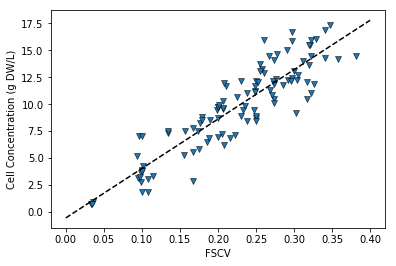

In [18]:
#xLinspace = np.linspace()
xLS = np.linspace(0,0.40,num=1000)
plt.plot(x,d,'v',markeredgewidth=0.5, markeredgecolor="k")
plt.plot(xLS,xLS*beta[1,0]+beta[0,0],'k--')
plt.xlabel("FSCV")
plt.ylabel("Cell Concentration (g DW/L)")
plt.savefig('FPCVvsDW.png', dpi=300)

In [5]:
#R^2 calculation
SStot = ((d-G*beta).transpose()*(d-G*beta))[0,0]
avg = np.average(gDWperL)
SSreg = np.sum((gDWperL-avg)**2)
Rsqr = 1-SStot/SSreg
print(("R^2 is %0.6f ")%(Rsqr))

R^2 is 0.809053 
